In [572]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat



In [573]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10 in dataset)
num_labels = 10

path = "/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise3/Data/ex3data1.mat"
#  training data stored in arrays X, y
data = loadmat(path)
X = data["X"]
y = data["y"]
m = y.size

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
# y[y == 10] = 0

print(X.shape)
print(y.shape)
print(m)


(5000, 400)
(5000, 1)
5000


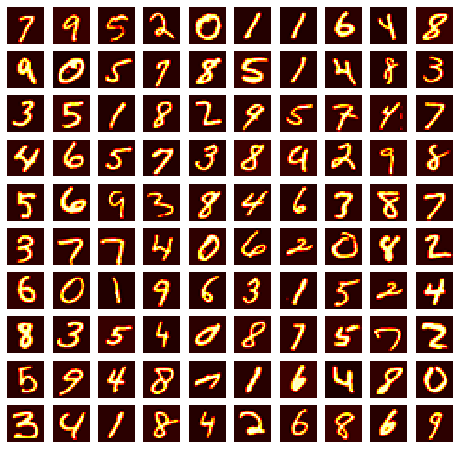

In [574]:
#Visualizing some of the images
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot") #reshape back to 20 pixel by 20 pixel
        #order = 'F' ensures upright images
        axis[i,j].axis("off")
        

In [575]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    return 1/ (1 + np.exp(-z))

def cost_lr(theta, X, y, Lambda):
    """
    Takes in numpy array of theta, X, y, and float lambda to compute the regularized logistic cost function 
    """
    m = y.size
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0 = 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad = np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad
    
    

In [576]:
#Test case
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
#print("Theta: \n",theta_t)
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
#print("X: \n",X_t)
y_t = np.array([1,0,1,0,1]).reshape(5,1)
#print("y: \n",y_t)
J, grad = cost_lr(theta_t, X_t, y_t, 3)

print("Cost:",J,"\nExpected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 
Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [577]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        cost, grad = cost_lr(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [578]:
theta_test, J_test = gradientDescent(X_t,y_t,theta_t,0.1,300,1)

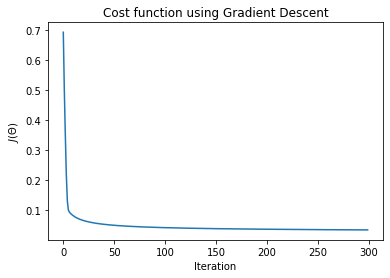

In [764]:
#Visualizing test case cost history
plt.plot(J_test[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

In [580]:
def oneVsAll(X, y, num_labels, Lambda):
    """
    Takes in numpy array of X,y, int num_labels and float lambda to train multiple logistic regression classifiers
    depending on the number of num_labels using gradient descent. 
    
    Returns a matrix of theta, where the i-th row corresponds to the classifier for label i
    """
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J = []
    # add intercept terms
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

theta_test, J_test = oneVsAll(X,y,10,1)

In [581]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    return np.argmax(predictions,axis=1)+1

pred = predictOneVsAll(theta_test, X)
print("Predicted Values: ",pred)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")


Predicted Values:  [10 10 10 ...  9  9  7]
Training Set Accuracy: 91.42 %


In [582]:
#Loading optimized weights from mat file
path2 = "/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise3/Data/ex3weights.mat"
data2 = loadmat(path2)
Theta1 = data2["Theta1"] # Theta1 has size 25 x 401
Theta2 = data2["Theta2"] # Theta2 has size 10 x 26
print(Theta1.shape)
print(Theta2.shape)
parameters = np.append(Theta1.flatten(),Theta2.flatten())
print(parameters.shape)

(25, 401)
(10, 26)
(10285,)


In [583]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network by feedforward Propagation
    """
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

pred2 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")
print(pred2)

Training Set Accuracy: 97.52 %
[10 10 10 ...  9  9  9]


In [584]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [757]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 (25 x 401) and Theta2 (10 x 26)
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J = 0 
    X = np.hstack((np.ones((m,1)),X))  # 5000 x 401
    y10 = np.zeros((m,num_labels)) # 5000 x 10

    a1 = sigmoid(X @ Theta1.T) 
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer 5000 x 26
    a2 = sigmoid(a1 @ Theta2.T) # output layer 5000 x 10

    
    #Convert y (5000,1) to y10 (5000,10) consisting of 0's and 1's 
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = (1/m) * J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi = X[i,:] # 401 x 1
        a1i = a1[i,:] # 1 x 26
        a2i = a2[i,:] # 1 x 10
        
        d2 = a2i - y10[i,:] # 1 x 10
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T))) # 26 x 26
        #print(d1.shape)
        #print(d2.shape)
        grad1 = grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T # 25 x 401
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T # 10 x 26
        #print(grad1.shape)
        #print(grad2.shape)
    grad1 = (1/m) * grad1
    grad2 = (1/m) * grad2

    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

In [740]:
xi_ = np.ones([401,])
print(xi_.shape)
a1i_ = np.ones([1,26])
a2i_ = np.ones([1,10])
y1_ = np.ones([1,10])*2
d2_ = a2i_ - y1_
t2 = np.ones([10,26])
t1 = np.ones([25,401])
b = np.hstack((1,xi_@(t1.T)))
print(b.shape)
d1_ = t2.T @ d2_.T * sigmoidGradient(b)
print(d1_.shape)
print(d2_.shape)
#c = (d1_[1:][:,np.newaxis]) @ (xi_[:,np.newaxis].T)
#print(c.shape)
print((d2_.T * sigmoidGradient(b)).shape)
print((d1_[1:][:,np.newaxis]).shape) 
print((xi_[:,np.newaxis].T).shape)
print((d2_.T[:,np.newaxis]).shape)
print((a1i_[:,np.newaxis].T).shape)

(401,)
(26,)
(26, 26)
(1, 10)
(10, 26)
(25, 1, 26)
(1, 401)
(10, 1, 1)
(26, 1, 1)


In [752]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(),Theta2.flatten())
J,reg_J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]
print("Cost (non-regularized) at initial parameters:",J,"\nCost (Regularized) at initial parameters:",reg_J)

Cost (non-regularized) at initial parameters: 0.2876291651613188 
Cost (Regularized) at initial parameters: 0.38376985909092354


In [758]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid)

In [759]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6 / (L_in+L_out)) 
    print(np.sqrt(epi))
    W = (np.random.rand(L_out,L_in+1)+np.random.randint(0,5))*(2*epi) -epi
    return W

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.T.flatten(),initial_Theta2.T.flatten())
#print(initial_Theta1)


0.11881770515720091
0.4140393356054125


In [760]:

print(initial_Theta1.shape)
print(initial_Theta2.shape)
print(initial_nn_params.shape)
pred4 = predict(initial_Theta1, initial_Theta2, X)
print("Training Set Accuracy:",sum(pred4[:,np.newaxis]==y)[0]/5000*100,"%")

(25, 401)
(10, 26)
(10285,)
Training Set Accuracy: 10.0 %


(25, 401)
(25, 401)
0.5816639343954746


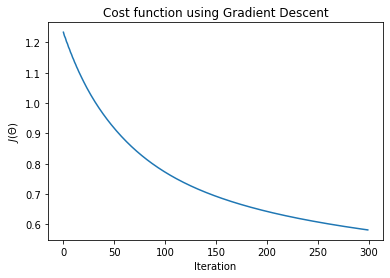

In [761]:
def gradientDescentnn(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    T1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    print(T1.shape)
    T2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    print(T1.shape)
    
    m = len(y)
    J_history =[]
    
    for i in range(num_iters):
        nn_params_1 = np.append(T1.flatten(),T2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params_1,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        T1 = T1 - (alpha * grad1)
        T2 = T2 - (alpha * grad2)
        J_history.append(cost)
        #print(T1[0][0])
    
    nn_paramsFinal = np.append(T1.flatten(),T2.flatten())
    #print(J_history[-1])
    return nn_paramsFinal , J_history

nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,1.6,400,1,input_layer_size, hidden_layer_size, num_labels)
plt.plot(nnJ_history[100:400])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
final_Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
final_Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
#print(Theta1)
print(min(nnJ_history))



In [762]:
pred5 = predict(final_Theta1, final_Theta2, X)
print("Training Set Accuracy:",sum(pred5[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 93.72 %


In [721]:
X.shape

(5000, 400)

In [722]:
X[1,:].shape

(400,)